<a href="https://colab.research.google.com/github/Bakti-Abdul-Nafi/BertProject/blob/main/Bert_ver_3_grab_app(80_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys 
import pandas as pd
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv("drive/MyDrive/Sentimen Analisis/Dataset/grab-data.csv")
df.head()

,userName,score,at,content
0,Tiara Amanda,5,2022-04-03 13:29:53,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,5,2022-04-03 13:28:08,Sangat banyak membantu
2,Tikkhavedo Tunky,1,2022-04-03 12:28:48,"Bug sinyal sangat mengganggu, tlg diperbaiki l..."
3,Tikkhavedo Tunky,1,2022-04-03 12:28:48,"Bug sinyal sangat mengganggu, tlg diperbaiki l..."
4,Soegiono Liem,3,2022-04-03 12:27:18,Tolong petanya nya di update dong. Anda pakai ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   score     10000 non-null  int64 
 2   at        10000 non-null  object
 3   content   10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df.tail()

,userName,score,at,content
9995,Hendri Setiyadi,2,2018-09-13 07:08:01,Untuk komplain sangat susah. Tidak seperti apl...
9996,Nur Hidayah,2,2018-09-13 04:07:40,"Jelek, setelah diperbaharui malah tidak bisa d..."
9997,Bakoy dbasick,1,2018-09-12 22:51:16,Aplikasi paling jelek sepanjang sejarah saya s...
9998,Muhammad Fajar Zaenudin,1,2018-09-12 15:41:40,"Update TEROOSS,,, sampe 1 GB aja lah sekalian ..."
9999,oktavianus rudyanto,5,2018-09-12 11:34:41,Pertahankan terus atas layanan jemput-antarnya...


In [ ]:
df.columns = df.columns.str.replace('content', 'Comment')

In [ ]:
df.head()

,userName,score,at,Comment
0,Tiara Amanda,5,2022-04-03 13:29:53,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,5,2022-04-03 13:28:08,Sangat banyak membantu
2,Tikkhavedo Tunky,1,2022-04-03 12:28:48,"Bug sinyal sangat mengganggu, tlg diperbaiki l..."
3,Tikkhavedo Tunky,1,2022-04-03 12:28:48,"Bug sinyal sangat mengganggu, tlg diperbaiki l..."
4,Soegiono Liem,3,2022-04-03 12:27:18,Tolong petanya nya di update dong. Anda pakai ...


#Data Preprocessing

In [ ]:
# Merubah menjadi huruf kecil dan tipe data menjadi str
df['cleaned_comment'] = df['Comment'].apply(lambda x: x.lower())
df['cleaned_comment'] = df['cleaned_comment'].astype(str)
df.tail()

,userName,score,at,Comment,cleaned_comment
9995,Hendri Setiyadi,2,2018-09-13 07:08:01,Untuk komplain sangat susah. Tidak seperti apl...,untuk komplain sangat susah. tidak seperti apl...
9996,Nur Hidayah,2,2018-09-13 04:07:40,"Jelek, setelah diperbaharui malah tidak bisa d...","jelek, setelah diperbaharui malah tidak bisa d..."
9997,Bakoy dbasick,1,2018-09-12 22:51:16,Aplikasi paling jelek sepanjang sejarah saya s...,aplikasi paling jelek sepanjang sejarah saya s...
9998,Muhammad Fajar Zaenudin,1,2018-09-12 15:41:40,"Update TEROOSS,,, sampe 1 GB aja lah sekalian ...","update terooss,,, sampe 1 gb aja lah sekalian ..."
9999,oktavianus rudyanto,5,2018-09-12 11:34:41,Pertahankan terus atas layanan jemput-antarnya...,pertahankan terus atas layanan jemput-antarnya...


In [ ]:
#df.to_excel('data_case_folding.xlsx')

In [ ]:
df.drop(['at','score'], axis=1, inplace=True)

In [ ]:
df.head()

,userName,Comment,cleaned_comment
0,Tiara Amanda,orangya ramah dan menyengkan trimksih,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,Sangat banyak membantu,sangat banyak membantu
2,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...","bug sinyal sangat mengganggu, tlg diperbaiki l..."
3,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...","bug sinyal sangat mengganggu, tlg diperbaiki l..."
4,Soegiono Liem,Tolong petanya nya di update dong. Anda pakai ...,tolong petanya nya di update dong. anda pakai ...


In [ ]:
import re 
import string
#cleaning data 
def normalisasi(text):
  text = re.sub(r'@[A-za-z0-9]+', '', text) #removing @mentions
  text = re.sub('[0-9]+', '', text) #removing number
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RT
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'[\n]+', '', text) #remove new line
  text = re.sub(r"^\s+|\s+$", "", text) #remove leading and trailing spaces in a word using OR sign to delete both
  text = re.sub(r" +", " ", text) #remove multiple space betwen words
  text = re.sub(r'http\S+', '', text) #yang ini yang buat remove https
  text = re.sub(r"\b[a-zA-Z]\b", "", text) #removing single char
  text = re.sub('\s+', ' ', text) #removing multiple whitespace
  text = re.sub(r'\W', " ", text)
  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')#remove tab, new line, and back slice
  text = re.sub(r'[^\w\s]', ' ', text) #remove puntuation $ emoji (remove all besides \w > word dan \s > space)
  text = re.sub(r"²|¹|³|⁰|ⁱ|⁴|⁵|⁶|⁷|⁸|⁹|⁺|⁻|⁽|⁾|ⁿ]+", "", text) #ilangin pangkat
  text = re.sub(r'_', '',text) #ilangin garisbawah
  return text
df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: normalisasi(x))
#df.head()
df

,userName,Comment,cleaned_comment
0,Tiara Amanda,orangya ramah dan menyengkan trimksih,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,Sangat banyak membantu,sangat banyak membantu
2,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengganggu tlg diperbaiki l...
3,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengganggu tlg diperbaiki l...
4,Soegiono Liem,Tolong petanya nya di update dong. Anda pakai ...,tolong petanya nya di update dong anda pakai ...
...,...,...,...
9995,Hendri Setiyadi,Untuk komplain sangat susah. Tidak seperti apl...,untuk komplain sangat susah tidak seperti apl...
9996,Nur Hidayah,"Jelek, setelah diperbaharui malah tidak bisa d...",jelek setelah diperbaharui malah tidak bisa d...
9997,Bakoy dbasick,Aplikasi paling jelek sepanjang sejarah saya s...,aplikasi paling jelek sepanjang sejarah saya s...
9998,Muhammad Fajar Zaenudin,"Update TEROOSS,,, sampe 1 GB aja lah sekalian ...",update terooss sampe gb aja lah sekalian uk...


In [ ]:
#df.to_excel('data_cleaning.xlsx')

In [ ]:
# Fungsi menghapus karakter berulang
def replace_repeat_character(text):
    # Pattern to look for three or more repetitions of any character, including newlines (contoh goool -> gol).
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1", text)
df['cleaned_comment'] = df['cleaned_comment'].apply(replace_repeat_character) 

In [ ]:
# Merubah kata tidak baku menjadi kata baku
dict = {row[0] : row[1] for _, row in pd.read_csv("drive/MyDrive/Sentimen Analisis//Kamus/kbba.txt", delimiter = "\t").iterrows()}

def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: kbbi(x))
df.head()

,userName,Comment,cleaned_comment
0,Tiara Amanda,orangya ramah dan menyengkan trimksih,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,Sangat banyak membantu,sangat banyak membantu
2,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengangu tlg diperbaiki lagi...
3,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengangu tlg diperbaiki lagi...
4,Soegiono Liem,Tolong petanya nya di update dong. Anda pakai ...,tolong petanya nya di update dong anda pakai p...


In [ ]:
#df.to_excel('data_normalisasi.xlsx')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['cs','nya','mei','pun','an','yaa','jm','yaaa','pas','cod','eh','lah','sih','deh','kan','dok','kok',
                     'ba','ko','job','lot','jam','si','hahahaha','yaah','wib','tuk','mau','mantab','sd','rb','do','he',
                     'in','min','tkp','tfk','urge','adl','kes','waw','ui','yra','gaj','oj','mnit','bravo','ny','atw',
                     'wah','sp','euy','duly','nge','ibi','dn','ane','siy','ss','sc','tu','wa','mbok','supe','kg','trf',
                     'wkwkw','wkkwwk','wkwww','wkwkwk','wkwkwkw','wkkakakakak','wkwkwkwkwkwk','woy','woyy','woi','jos',
                     'yh','josss','ba','ih','loh','lha','lho','iya','ckckckck','yaa','besti','mantaf','ajibbbb','niih',
                     'nihh','wow','bosq','bos','ku','ah','ya','via','mah','fc','oi','hahah','hahaha','ahhahahaha','bhaha',
                     'wuahh','neng','puaaasss','skaliiiiiii','lahh','fak','hadeuhh','hhmm','hmm','hmmm','mantaffff',
                     'mantapp','mantabs','bgttt','mantabbb','mntap','pdkt','ahhh','sihh','cok','wahh','aaaaaaaa']

    text = [i for i in text if not i in listStopword]
    text = " ".join(text)
    return text

df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: noise(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   userName         10000 non-null  object
 1   Comment          10000 non-null  object
 2   cleaned_comment  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
df

,userName,Comment,cleaned_comment
0,Tiara Amanda,orangya ramah dan menyengkan trimksih,orangya ramah dan menyengkan trimksih
1,Kaizar Heril,Sangat banyak membantu,sangat banyak membantu
2,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengangu tlg diperbaiki lagi...
3,Tikkhavedo Tunky,"Bug sinyal sangat mengganggu, tlg diperbaiki l...",bug sinyal sangat mengangu tlg diperbaiki lagi...
4,Soegiono Liem,Tolong petanya nya di update dong. Anda pakai ...,tolong petanya di update dong anda pakai peta ...
...,...,...,...
9995,Hendri Setiyadi,Untuk komplain sangat susah. Tidak seperti apl...,untuk komplain sangat susah tidak seperti apli...
9996,Nur Hidayah,"Jelek, setelah diperbaharui malah tidak bisa d...",jelek setelah diperbaharui bahkan tidak bisa d...
9997,Bakoy dbasick,Aplikasi paling jelek sepanjang sejarah saya s...,aplikasi paling jelek sepanjang sejarah saya s...
9998,Muhammad Fajar Zaenudin,"Update TEROOSS,,, sampe 1 GB aja lah sekalian ...",update teros sampai gb saja sekalian ukuran ap...


In [ ]:
#memisahkan dataset yang akan di train 
df1 = df.copy()
df1.drop(['userName','Comment'], axis=1, inplace=True)
df1.drop_duplicates(keep=False,inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
len(df1)

8971

#Data Visulazation

In [ ]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in df.cleaned_comment:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

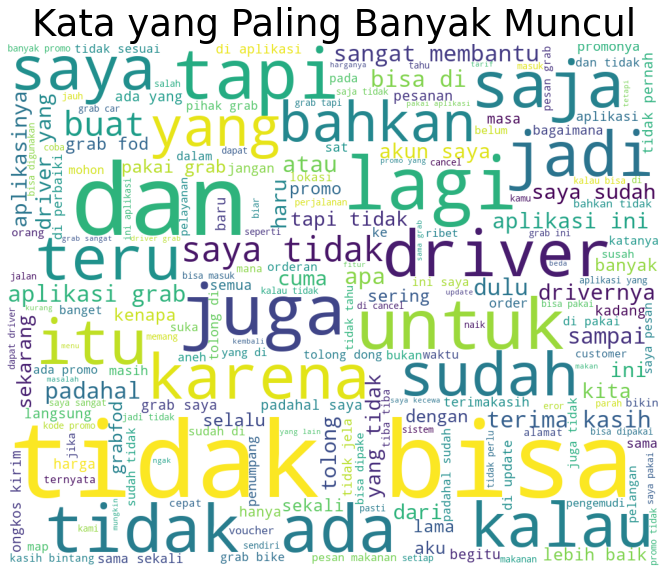

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

#Lexicon Proces

In [ ]:
with open('drive/MyDrive/Sentimen Analisis/Kamus/sentimentword.txt', 'r') as data:
    for line in data :
        line.rstrip()
    plaintext = data.read()
    
plaintext = plaintext.replace(' ', ',')

with open('drive/MyDrive/Sentimen Analisis/Kamus/kata_sentimen_negatif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext1 = data.read()
    plaintext1 = plaintext1.rstrip()
    
with open('drive/MyDrive/Sentimen Analisis/Kamus/kata_sentimen_positif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext2 = data.read()
    plaintext2 = plaintext2.rstrip()

with open("drive/MyDrive/Sentimen Analisis/Kamus/kata_sentimen.txt", 'w') as f:
    f.write(plaintext + '\n')
    
with open("drive/MyDrive/Sentimen Analisis/Kamus/kata_sentimen_fix.txt", 'w') as f:
    f.write(plaintext + '\n')
    f.write(plaintext1 + '\n')
    f.write(plaintext2 + '\n')

with open("drive/MyDrive/Sentimen Analisis/Kamus/kata_sentimen_fix.txt", 'r') as f:
    sentifix = f.read()
sentifix = sentifix.replace(',', '\t')

with open("drive/MyDrive/Sentimen Analisis/Kamus/sentifix.txt", 'w') as f:
    f.write(sentifix + '\n')

In [ ]:
kamus_sentimen = 'sentifix.txt'

def sentiment_dict(kamus_sentimen):
    kamus = open(kamus_sentimen)
    scores = {} # initialize an empty dictionary
    for line in kamus:
        term, score = line.split("\t") # The file is comma-delimited. 
        scores[term] = int(score) # Convert the score to an integer.

    return scores

#Lexicon Labeling

In [ ]:
import codecs

doc = codecs.open('drive/My Drive/Sentimen Analisis/Kamus/sentifix.txt','rU','UTF-8') #open for reading with "universal" type set

kamus = pd.read_csv(doc, sep='\t', header=None)
kamus

,0,1
0,kali,-1
1,terbatas,-3
2,penyebabnya,-4
3,positif,-1
4,korona,-2
...,...,...
10230,melarikan,3
10231,vakansi,3
10232,spesial,4
10233,asrama,3


In [ ]:
#mengatur index pada kamus yang ada
kamus = kamus.set_index(0).T.to_dict('records')
dct = {}
for item in kamus:
    dct.update(item)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  


In [ ]:
#memasukan skor pada tiap baris yang ada pada dataset
data = df1['cleaned_comment']
skor = []

for line in data:
    tweet_word = line.split()
    #sent_score is a variable which will take care of word strength / word weightage
    sum_score = 0
    sent_score = 0
    l = len(tweet_word)
    
    for word in tweet_word:
        word = word.rstrip('?:!.,;"!@')
        word = word.replace("\n", "")

        if word in dct.keys():
            sum_score += int(dct[word])\
    
    skor.append(sum_score)


print(len(skor))

8971


In [ ]:
#menambahkan coloum baru pada dataset
df1['nilai'] = skor
df1.head(10)

,cleaned_comment,nilai
0,orangya ramah dan menyengkan trimksih,5
1,sangat banyak membantu,10
2,upgrade melulu giliran nyesuain alamat susah,-3
3,mnyenangkn driver grab juga rmah terima kasih ...,6
4,sudah pesen makan berkali drivernya tidak niat...,-7
5,pelayanan ok bangat dan cepat sampai tempat tu...,9
6,aplikasinya sudah bagus Cuma drivernya yang ng...,-5
7,pengiriman makanan sangat lama fitur pembatalk...,-9
8,aplikasi tidak beres masa masih malam tidak ad...,-16
9,jangan pernah persulit driver,-3


In [ ]:
#Pelabelan sentimen netral , negatif dan positif
def f(row):
    if row['nilai'] > 3 :
        val = 'positif'
    elif row['nilai'] < -2 :
        val = 'negatif'
    else:
        val = 'netral'
    return val

df1['sentimen'] = df1.apply(f, axis = 1)
df1

,cleaned_comment,nilai,sentimen
0,orangya ramah dan menyengkan trimksih,5,positif
1,sangat banyak membantu,10,positif
2,upgrade melulu giliran nyesuain alamat susah,-3,negatif
3,mnyenangkn driver grab juga rmah terima kasih ...,6,positif
4,sudah pesen makan berkali drivernya tidak niat...,-7,negatif
...,...,...,...
8966,untuk komplain sangat susah tidak seperti apli...,-37,negatif
8967,jelek setelah diperbaharui bahkan tidak bisa d...,-12,negatif
8968,aplikasi paling jelek sepanjang sejarah saya s...,-14,negatif
8969,update teros sampai gb saja sekalian ukuran ap...,-15,negatif


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8971 entries, 0 to 8970
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_comment  8971 non-null   object
 1   nilai            8971 non-null   int64 
 2   sentimen         8971 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.4+ KB


In [ ]:
df1 = pd.read_csv('/content/Final_data_process.csv')

In [ ]:
df1.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
9868    8915
9869    8915
9870    8915
9871    8915
9872    8915
Name: Unnamed: 0, Length: 9873, dtype: int64

#Lexicon Result Visualization and Categorize

In [ ]:
positif1=df1.loc[df1['nilai'] > 15].head()
negatif1 = df1.loc[df1['nilai'] < -25].head()
netral1 = df1.loc[df1['nilai'] == -1].head()
headings1 = positif1.columns
headings1

Index(['cleaned_comment', 'nilai', 'sentimen'], dtype='object')

In [ ]:
senti_count = df1['sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
negatif    5130
positif    2484
netral     2259
Name: sentimen, dtype: int64


In [ ]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
kolom=[(sub[1], sub[0]) for sub in senti_count2]
kolom

[('negatif', 5130), ('positif', 2484), ('netral', 2259)]

In [ ]:
labels=[]
values=[]
for row in kolom:
    labels.append(row[0])
    values.append(row[1])
print(labels)
print(values)

['negatif', 'positif', 'netral']
[5130, 2484, 2259]


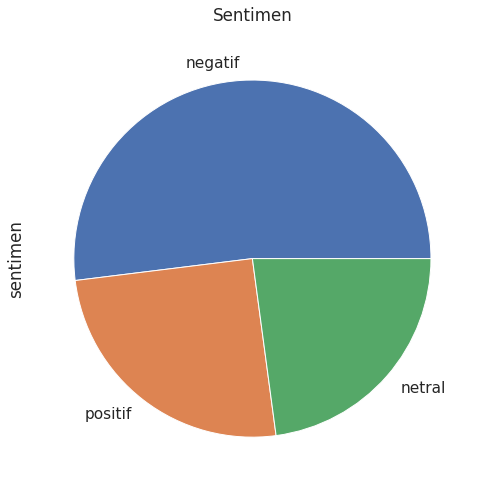

In [ ]:
sns.set(font_scale=1.4)
senti_count.plot(kind='pie', figsize=(8, 10))#, rot=0)
plt.title("Sentimen", y=1.02);

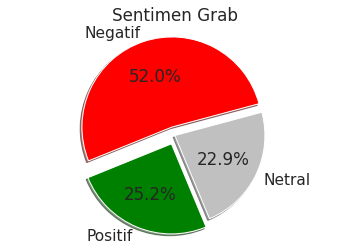

In [ ]:
my_labels = 'Negatif','Positif','Netral'
my_colors = ['red','green','silver']
my_explode = (0.1, 0.1, 0)
plt.pie(senti_count, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentimen Grab')
plt.axis('equal')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_comment  9873 non-null   object
 1   nilai            9873 non-null   int64 
 2   sentimen         9873 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.5+ KB


In [ ]:
df1.head()

,cleaned_comment,nilai,sentimen
0,orangya ramah dan menyengkan trimksih,5,positif
1,sangat banyak membantu,10,positif
2,upgrade melulu giliran nyesuain alamat susah,-3,negatif
3,mnyenangkn driver grab juga rmah terima kasih ...,6,positif
4,sudah pesen makan berkali drivernya tidak niat...,-7,negatif


In [ ]:
df1.sentimen.value_counts()

negatif    5130
positif    2484
netral     2259
Name: sentimen, dtype: int64

In [ ]:
possible_labels = df1.sentimen.unique()

In [ ]:
label_dict = {} # Creating an empty Dict, & Looping over the possible labels 
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
label_dict

{'positif': 0, 'negatif': 1, 'netral': 2}

In [ ]:
df1['label'] = df1.sentimen.replace(label_dict)

In [ ]:
df1.drop(['nilai'], axis=1, inplace=True)

In [ ]:
df1.head()

,cleaned_comment,sentimen,label
0,orangya ramah dan menyengkan trimksih,positif,0
1,sangat banyak membantu,positif,0
2,upgrade melulu giliran nyesuain alamat susah,negatif,1
3,mnyenangkn driver grab juga rmah terima kasih ...,positif,0
4,sudah pesen makan berkali drivernya tidak niat...,negatif,1


#Bert Setup

In [ ]:
import tensorflow as tf
import torch
from tqdm.notebook import tqdm

# Checking for the GPU
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.9.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.12.1+cu113
transformers: 4.21.3



#Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val =  train_test_split(df1.index.values,
                                                   df1.label.values,
                                                   test_size=0.2,
                                                   random_state=17,
                                                   stratify=df1.label.values
)

In [ ]:
# Creating the New column 'data_type'
df1['data_type'] = ['not_set']*df1.shape[0]

In [ ]:
df1.loc[x_train, 'data_type'] = 'train'
df1.loc[x_val, 'data_type'] = 'val'

In [ ]:
df1.groupby(['sentimen', 'label', 'data_type']).count()

cleaned_comment
sentimen label data_type                 
negatif  1     train                 4104
               val                   1026
netral   2     train                 1807
               val                    452
positif  0     train                 1987
               val                    497

#Load Tokenizer dan Proses Encoding Data

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
# The Tokenizer came from the Pre_trained BERT
# 'bert-base-uncased' means that we are using all lower case data
# `do_lower_case` Convert everything to lower-case.

tokenizer = BertTokenizer.from_pretrained('cahya/bert-base-indonesian-1.5G', 
                                          do_lower_case=True)

In [ ]:
# Print the original sentence.
print(' Original: ', df1.cleaned_comment[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(df1.cleaned_comment[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(df1.cleaned_comment[0])))


 Original:  orangya ramah dan menyengkan trimksih
Tokenized:  ['orang', '##ya', 'ramah', 'dan', 'menye', '##ng', '##kan', 'trim', '##ks', '##ih']
Token IDs:  [1714, 1508, 11040, 1509, 2002, 9563, 1507, 15834, 5212, 1599]


In [ ]:
# Encoding the Training data
encoded_data_train = tokenizer.batch_encode_plus(
    df1[df1.data_type=='train'].cleaned_comment.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

# Encoding the Validation data
encoded_data_val = tokenizer.batch_encode_plus(
    df1[df1.data_type=='val'].cleaned_comment.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

# Spliting the data for the BERT training

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df1[df1.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df1[df1.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_val 

tensor([[    3,  2059,  1848,  ...,     2,     2,     2],
        [    3,  4705,  1653,  ...,     2,     2,     2],
        [    3, 17212, 14126,  ...,     2,     2,     2],
        ...,
        [    3,  8407,  1495,  ...,     2,     2,     2],
        [    3,  8407,  1495,  ...,     2,     2,     2],
        [    3,  8407,  1495,  ...,     2,     2,     2]])

In [ ]:
# Creating two different dataset
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train)

7898

In [ ]:
len(dataset_val)

1975

#Implementasi Model Bert

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("cahya/bert-base-indonesian-1.5G",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at cahya/bert-base-indonesian-1.5G were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('=== Embeddding Layer ===\n')
for p in params[0:5]:
  print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


print('\n=== Fist Transformers ===\n')
for p in params[5:12]:
  print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n=== Output Layer ===\n')
for p in params[-4:]:
  print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

=== Embeddding Layer ===

bert.embeddings.word_embeddings.weight                  (32000, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

=== Fist Transformers ===

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)

=== Output Layer ===

bert.pooler.dense.weight                   

#Membuat Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
#Membagi jumlah epcohs dari jumlah dataset yang digunakan
batch_size = 16

# We Need two different dataloder
# membuat data menjadi lebih terstruktur
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                              sampler=RandomSampler(dataset_val),
                              batch_size=batch_size)

# Membuat Optimizer

In [ ]:
#mencecgah loss dan overfiting
from transformers import AdamW, get_linear_schedule_with_warmup


In [ ]:
# AdamW is an optimizer which is a Adam Optimzier with weight-decay-fix
optimizer = AdamW(model.parameters(),
                  lr = 1e-4,
                  eps = 1e-8
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
epochs = 6

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

#Mendefinisikan Performa Metrics

In [ ]:
import numpy as np
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [ ]:
def f1_score_func(preds,labels):
  preds_flat = np.argmax(preds, axis =1).flatten()
  labels_flat = labels.flatten()
  return f1_score(labels_flat,preds_flat, average = 'weighted')

def precision_score_func(preds,labels):
  preds_flat = np.argmax(preds, axis =1).flatten()
  labels_flat = labels.flatten()
  return precision_score(labels_flat,preds_flat, average = 'macro')

def recall_score_func(preds,labels):
  preds_flat = np.argmax(preds, axis =1).flatten()
  labels_flat = labels.flatten()
  return recall_score(labels_flat,preds_flat, average = 'macro')

def accuracy_score_func(preds,labels):
  preds_flat = np.argmax(preds, axis =1).flatten()
  labels_flat = labels.flatten()
  return accuracy_score(labels_flat,preds_flat)

In [ ]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    # Iterating over all the unique labels
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

#Proses Training Model BERT

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)


cuda


In [ ]:
from collections import defaultdict
history = defaultdict(list)

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()          # Sending our model in Training mode
    
    loss_train_total = 0   # Setting the training loss to zero 

    # Setting up the Progress bar to Moniter the progress of training
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad() 
        
        # As our dataloader has '3' iteams so batches will be the Tuple of '3'
        batch = tuple(b.to(device) for b in batch)
        
        # INPUTS
        # Pulling out the inputs in the form of dictionary
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        # OUTPUTS
        outputs = model(**inputs) 
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()           

        # Gradient Clipping -- Taking the Grad. & gives it a NORM value ~ 1 
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.2f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_precision = precision_score_func(predictions,true_vals)
    val_recall = recall_score_func(predictions,true_vals)
    val_accuracy = accuracy_score_func(predictions,true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Precision Score: {val_precision}')
    tqdm.write(f'recall Score: {val_recall}')
    tqdm.write(f'Accuracy: {val_accuracy}')
    
    history['train_loss'].append(loss_train_avg)
    history['val_loss'].append(val_loss)
    history['f1_score'].append(val_f1)
    history['Precision'].append(val_precision)
    history['recall'].append(val_recall)
    history['Accuracy'].append(val_accuracy)


    # training_stats.append(
    #     {
    #         'epoch': epoch + 1,
    #         'Training Loss': loss_train_avg,
    #         'Valid. Loss': val_loss,
    #         'F1 Score':val_f1,
    #         'Precision score':val_recall,
    #         'Recall score': val_recall,
    #         'Accuracy score': val_accuracy
    #     }
    # )


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6103158755914161
Validation loss: 0.5552938670040138
F1 Score (Weighted): 0.785758634215867
Precision Score: 0.8454594557466312
recall Score: 0.7305859023218764
Accuracy: 0.8030379746835443


Epoch 2:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.42607067879063154
Validation loss: 0.6645457745199242
F1 Score (Weighted): 0.8041120237630057
Precision Score: 0.8396790920316627
recall Score: 0.7530127142240125
Accuracy: 0.8182278481012658


Epoch 3:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.31788351061388187
Validation loss: 0.5821540416969407
F1 Score (Weighted): 0.8133964292801215
Precision Score: 0.799594891388857
recall Score: 0.7741797869276761
Accuracy: 0.8111392405063291


Epoch 4:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.22418972574125387
Validation loss: 0.6188430715457446
F1 Score (Weighted): 0.8348445708658225
Precision Score: 0.8020878367302554
recall Score: 0.8123521962911351
Accuracy: 0.8313924050632912


Epoch 5:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.15355549859229914
Validation loss: 0.7735907842438938
F1 Score (Weighted): 0.8426495129009113
Precision Score: 0.8287758700493537
recall Score: 0.8087488833245003
Accuracy: 0.8405063291139241


Epoch 6:   0%|          | 0/494 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.08952495820352785
Validation loss: 0.9067728969225315
F1 Score (Weighted): 0.8377151925671901
Precision Score: 0.8137961799889649
recall Score: 0.8094543154086878
Accuracy: 0.8334177215189873


#Visualisasi Model

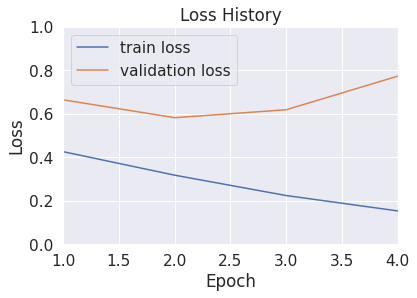

In [ ]:
#train loss and val loss

plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.xlim([1, 4]);

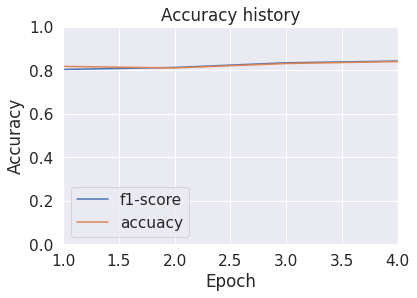

In [ ]:
#f1 score and Accuracy
plt.plot(history['f1_score'], label='f1-score')
plt.plot(history['Accuracy'], label='accuacy')

plt.title('Accuracy history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.xlim([1, 4]);

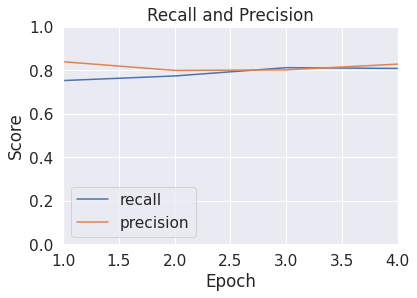

In [ ]:
#recall dan precision
plt.plot(history['recall'], label='recall')
plt.plot(history['Precision'], label='precision')

plt.title('Recall and Precision')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.xlim([1, 4]);

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
predictions

array([[-1.8931319, -2.2269125,  4.356726 ],
       [-4.0696974,  5.8374796, -1.6059489],
       [-1.8549702, -2.4218154,  4.5341973],
       ...,
       [-4.1014624,  5.837673 , -1.5609672],
       [-4.216917 ,  4.887659 , -0.3791561],
       [-2.7863922, -2.814437 ,  5.89346  ]], dtype=float32)

In [ ]:
true_vals

array([1, 1, 1, ..., 1, 1, 2])

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: positif
Accuracy: 372/497

Class: negatif
Accuracy: 920/1026

Class: netral
Accuracy: 354/452



In [ ]:
_, test_predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
test_predictions.shape

(1975, 3)

In [ ]:
test_predictions[0:3]

array([[-2.786392  , -2.814437  ,  5.89346   ],
       [ 4.64163   , -4.469416  , -0.21265246],
       [ 4.749925  , -4.4084263 , -0.41407087]], dtype=float32)

In [ ]:
test_preds_flat = np.argmax(test_predictions, axis=1).flatten()
test_preds_flat.shape

(1975,)

In [ ]:
test_preds_flat.sum()

2121

In [ ]:
# Plot Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

print(classification_report(true_vals,test_preds_flat))


              precision    recall  f1-score   support

           0       0.89      0.75      0.81       497
           1       0.93      0.90      0.91      1026
           2       0.63      0.78      0.70       452

    accuracy                           0.83      1975
   macro avg       0.81      0.81      0.81      1975
weighted avg       0.85      0.83      0.84      1975



In [ ]:
cm = confusion_matrix(true_vals,test_preds_flat)

Text(43.5, 0.5, 'Actual')

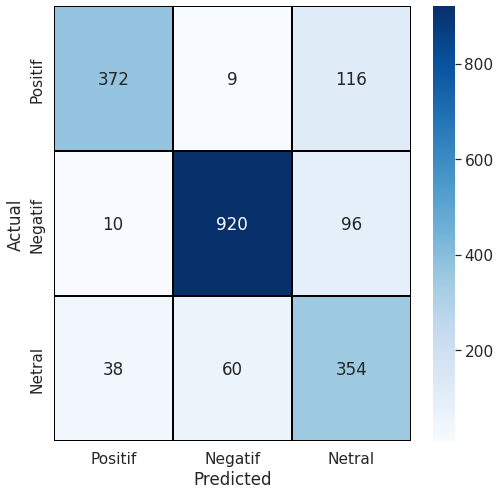

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , 
            xticklabels = ['Positif','Negatif','Netral'] , 
            yticklabels = ['Positif','Negatif','Netral'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
model2 =  BertForSequenceClassification.from_pretrained("cahya/bert-base-indonesian-1.5G",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model2.to(device)

Some weights of the model checkpoint at cahya/bert-base-indonesian-1.5G were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
model2.load_state_dict(torch.load('/content/finetuned_BERT_epoch_4.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
_, predictions2, true_vals2 = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions2, true_vals2)

Class: positif
Accuracy: 372/497

Class: negatif
Accuracy: 920/1026

Class: netral
Accuracy: 354/452

